# General cleaning of kc_house_data.csv

In [1]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.feature_selection import RFE
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

***
## Import dataframe from csv file using pd.read_csv function

In [2]:
#importing cvs file and saving it under a variable
kc_house_df = pd.read_csv('./data/kc_house_data.csv')

***
## Review kc_house_data
Info obtained from https://www.kaggle.com/harlfoxem/housesalesprediction about dataset:

"This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015."

In [3]:
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

***
## Build first model

In [6]:
import StatsFunctions as sf

In [7]:
target = 'price'
features_to_use = ['bedrooms', 'condition']

In [8]:
ols = sf.check_model(df=kc_house_df, features_to_use=features_to_use, target_col=target, show_summary=True)

bedrooms surpassed threshold with vif=9.97191342135912
condition surpassed threshold with vif=9.971913421359131
Model contains multicollinear features
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                          2.695e+04
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:09:38   Log-Likelihood:                     -3.0631e+05
No. Observations:               21597   AIC:                                  6.126e+05
Df Residuals:                   21595   BIC:                                  6.126e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                    

***
## Check count of columns of interest
Doing this helps answer important questions about the data such as: "What scale do the 'grade' and 'condition' columns range from?" or 'How many homes have more than 4 bedrooms?"

In [9]:
kc_house_df['condition'].value_counts() 

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

*We now know that the condition ratings of the houses range from 1-5*

In [10]:
kc_house_df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

*We now know that the grade ratings of the houses range from 1-13*

**I obtained a [pdf](https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2017/residential-westcentral/~/media/depts/assessor/documents/AreaReports/2017/Residential/013.ashx) from the King County website that explains the condition and grade ratings. Below is a screenshot of the rating information:**

<div>
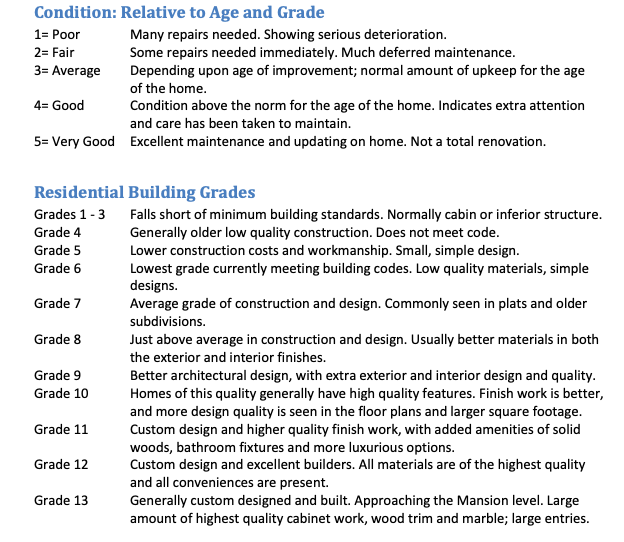
</div>

In [11]:
kc_house_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
# One house has 33 bedrooms. But the sqft is low so I will eliminate that outlier
kc_house_df = kc_house_df.drop(15856, axis = 0)

***
## Check for duplicates and delete if any

In [13]:
kc_house_df[kc_house_df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [14]:
print(kc_house_df.shape)
print(len(kc_house_df['id'].unique()))

(21596, 21)
21419


There appear to be some duplicates in the 'id' column. Let's deal with them.

In [15]:
id_dups_series = kc_house_df.duplicated(subset=['id'], keep = False)
id_dups = kc_house_df[id_dups_series]
kc_house_df.drop_duplicates(subset=['id'], keep='last', inplace=True)

In [16]:
print(kc_house_df.shape)
print(len(kc_house_df['id'].unique()))

(21419, 21)
21419


***
## Dealing with Nan values and converting column data types to appropriate data types
Dealing with Nan values depends on the information you want to use. If the columns you would like to use have Nan values, then you must deal with them. If not then you can just create a new dataframe with the columns you would like to use. However I like to get rid of the Nan values so thats what I will do.

In [17]:
# The 'date' column is an object so we should convert it to a datetime64[ns]
kc_house_df['date'] = kc_house_df['date'].astype('datetime64[ns]')

In [18]:
# Checking to see if conversion was successful
print(kc_house_df['date'].dtypes)


datetime64[ns]


In [19]:
# Check for Nan values in the columns
kc_house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [20]:
# Remove Nan rows from dataframe if they make up less than 1% of the data
kc_house_df = kc_house_df.dropna(subset=['view', 'waterfront'])

In [21]:
# Checking value counts for columns with Nan values
kc_house_df['waterfront'].value_counts()


0.0    18864
1.0      145
Name: waterfront, dtype: int64

In [22]:
kc_house_df['yr_renovated'].value_counts()

0.0       14987
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

We can see that there is an extraneous value of 0.0 that is being used as a placeholder. This could mean the following:
* 0.0 means that the house was never renovated
* 0.0 means that the house renovation history is not known

I do not plan on using 'waterfront' or 'yr_renovated' columns for my project so I will just leave them as is.

In [23]:
# Making sure 'view' Nan values were deleted
kc_house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3374
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

***
## Investigating columns
Here, I will be investiagting columns a bit deeper so I can better understand them and answer my questions.

In [24]:
kc_house_df['bedrooms'].describe()

count    19009.000000
mean         3.373823
std          0.903126
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [25]:
kc_house_df['condition'].describe()

count    19009.000000
mean         3.410805
std          0.649925
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [26]:
kc_house_df['grade'].describe()

count    19009.000000
mean         7.665159
std          1.174481
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [27]:
kc_house_df['sqft_living'].describe()

count    19009.000000
mean      2084.755747
std        922.595214
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [28]:
kc_house_df['sqft_lot'].describe()

count    1.900900e+04
mean     1.509645e+04
std      4.090052e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.616000e+03
75%      1.072300e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [29]:
kc_house_df['price'].describe()

count    1.900900e+04
mean     5.429366e+05
std      3.710642e+05
min      7.800000e+04
25%      3.249000e+05
50%      4.520000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

***
## Drop any columns that will not be used

In [30]:
kc_house_df = kc_house_df.drop(['sqft_basement', 'waterfront', 'bathrooms', 'view','yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'id', 'date'], axis=1)

In [31]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long
1,538000.0,3,2570,7242,2.0,3,7,2170,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,3,6,770,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,5,7,1050,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,3,8,1680,98074,47.6168,-122.045
5,1230000.0,4,5420,101930,1.0,3,11,3890,98053,47.6561,-122.005


***
## Create scatter matrix

I did an initial scatter matrix to help identifty categorical and continuous columns and to get a feel for the data

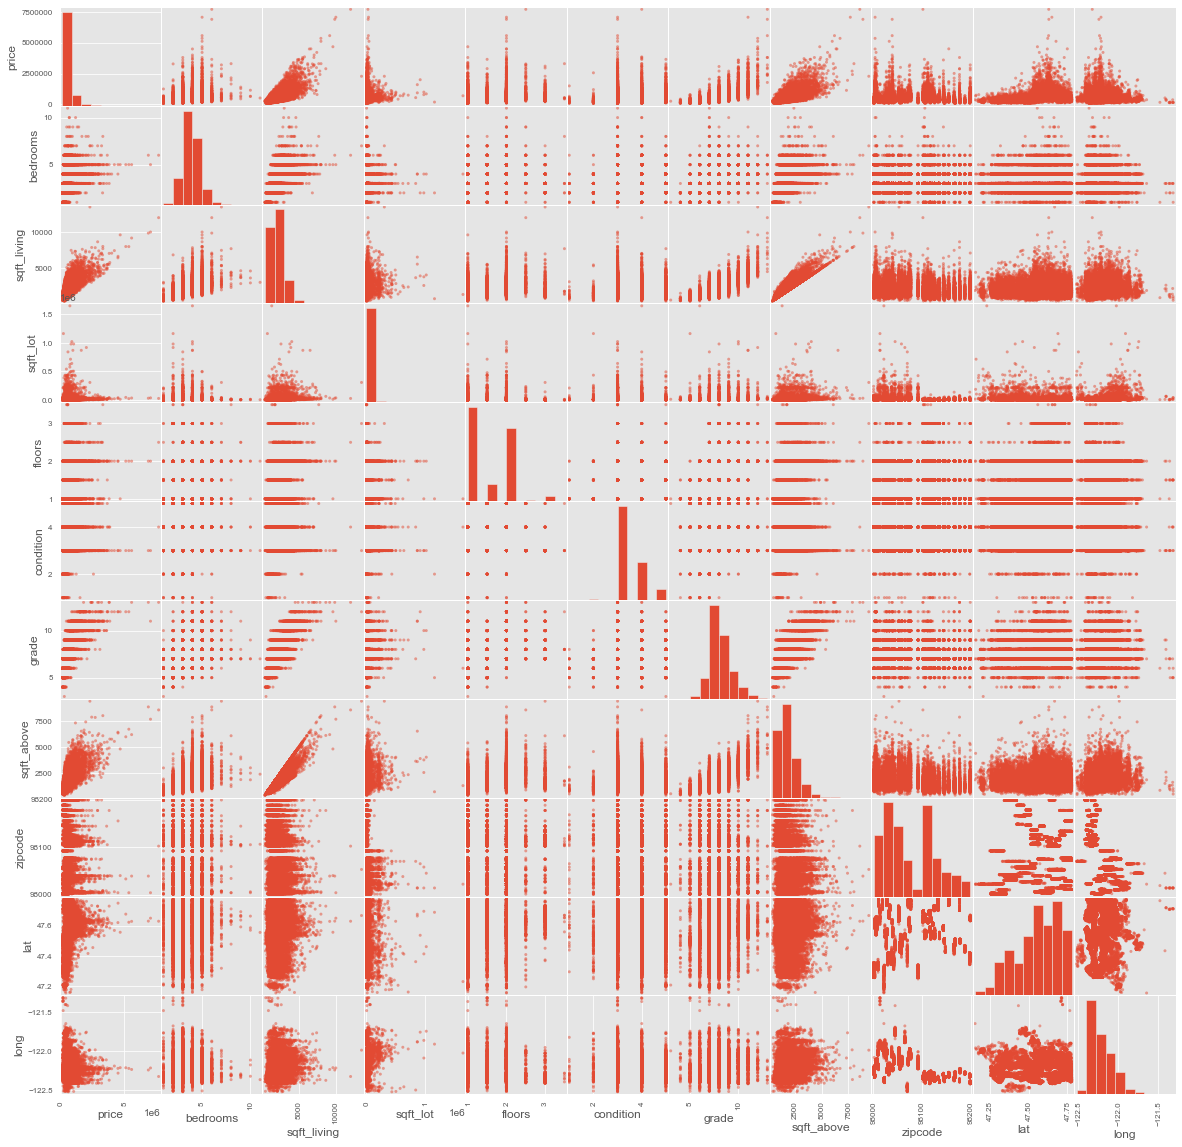

In [32]:
pd.plotting.scatter_matrix(kc_house_df, figsize=(20,20))
plt.show()

The scatter matrix shows us that 'floors', 'condition', 'grade', and 'bedroom' columns are categorical

***
## Creating histograms/distplots for columns of interest

<AxesSubplot:xlabel='sqft_living'>

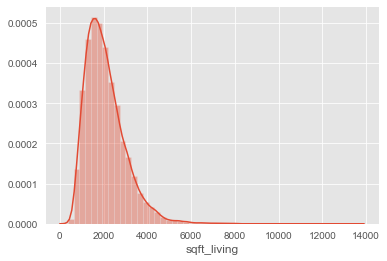

In [33]:
sns.distplot(kc_house_df['sqft_living'])

The sqft_living column (square footage home) seems normally distributed.

<AxesSubplot:xlabel='sqft_lot'>

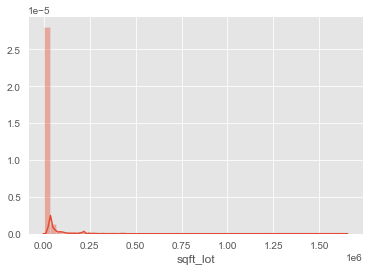

In [34]:
sns.distplot(kc_house_df['sqft_lot'])

Definitely crazy outliers here. Gotta deal with them

<AxesSubplot:xlabel='zipcode'>

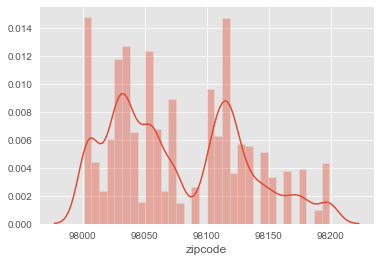

In [35]:
sns.distplot(kc_house_df['zipcode'])

<AxesSubplot:xlabel='sqft_above'>

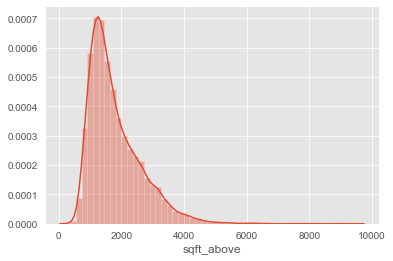

In [36]:
sns.distplot(kc_house_df['sqft_above'])
# Positive skewness

<AxesSubplot:xlabel='condition'>

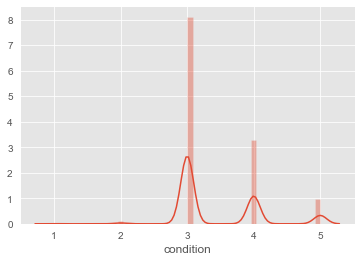

In [37]:
sns.distplot(kc_house_df['condition'])

<AxesSubplot:xlabel='price'>

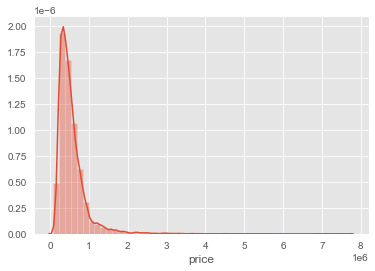

In [38]:
sns.distplot(kc_house_df['price'])

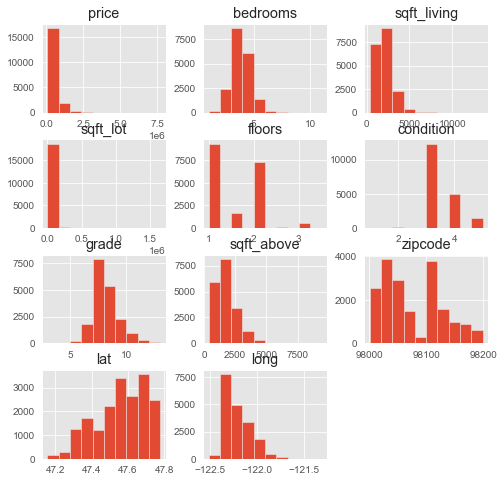

In [39]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
kc_house_df.hist(ax = ax);

***
## Let's deal with the outliers

<AxesSubplot:xlabel='price'>

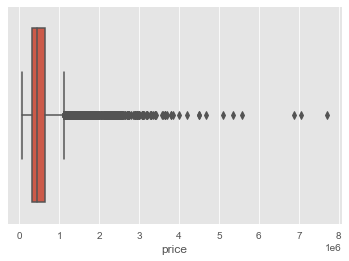

In [40]:
# Creating box plots to show outliers
sns.boxplot(x=kc_house_df['price'])

There are a good amount of outliers. A majority of them are on the left of the boxplot, meaning that these homes are probably really expensive, sp I will remove them using the z score.

<AxesSubplot:xlabel='bedrooms'>

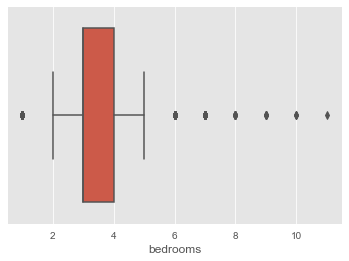

In [41]:
sns.boxplot(x=kc_house_df['bedrooms'])

<AxesSubplot:xlabel='sqft_living'>

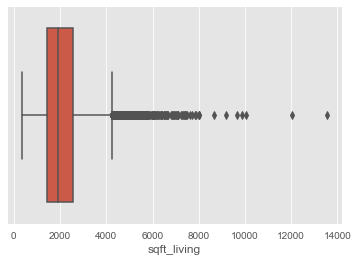

In [42]:
sns.boxplot(x=kc_house_df['sqft_living'])

<AxesSubplot:xlabel='sqft_above'>

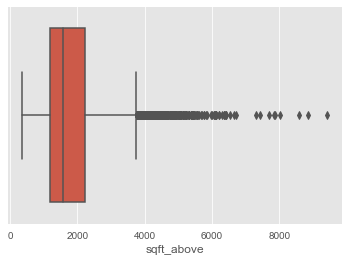

In [43]:
sns.boxplot(x=kc_house_df['sqft_above'])

In [44]:
z=np.abs(scs.zscore(kc_house_df))
print(z)

[[0.0133042  0.41393208 0.52596958 ... 0.88691949 1.15996434 0.74721892]
 [0.97812223 1.52122662 1.42509988 ... 0.92947471 1.28180104 0.1364241 ]
 [0.16456728 0.69336245 0.13522618 ... 1.09290234 0.28333199 1.27278657]
 ...
 [0.3852173  0.69336245 0.24414843 ... 1.28015947 0.35614564 1.05261634]
 [0.37955506 1.52122662 1.15411801 ... 1.24270805 0.24727046 0.60517362]
 [0.58734398 1.52122662 1.15411801 ... 1.24270805 0.24510768 0.60517362]]


In [45]:
z_df = kc_house_df[(z < 3).all(axis=1)]

In [46]:
kc_house_df.shape, z_df.shape

((19009, 11), (17925, 11))

In [47]:
kc_house_df = z_df

<AxesSubplot:xlabel='price'>

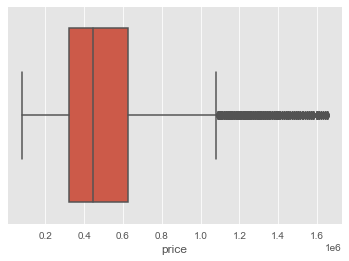

In [48]:
sns.boxplot(x=kc_house_df['price'])

<AxesSubplot:xlabel='bedrooms'>

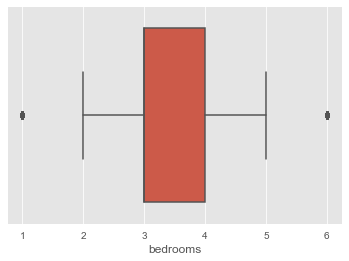

In [49]:
sns.boxplot(x=kc_house_df['bedrooms'])

<AxesSubplot:xlabel='sqft_living'>

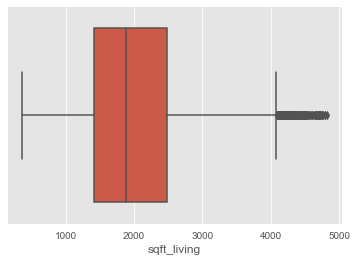

In [50]:
sns.boxplot(x=kc_house_df['sqft_living'])

<AxesSubplot:xlabel='sqft_above'>

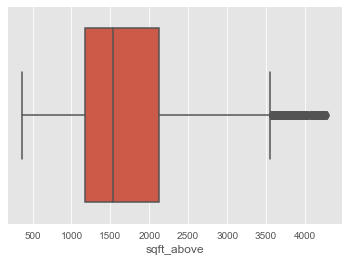

In [51]:
sns.boxplot(x=kc_house_df['sqft_above'])

Boxplots look a lot better now that outliers have been removed!

***
## Looking at correlation and multicollinearity of features

In [52]:
kc_house_df.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long
price,1.000000,0.306647,0.637476,0.090776,0.265016,0.045473,0.648041,0.528049,-0.016294,0.404629,0.039670
bedrooms,0.306647,1.000000,0.610137,0.086051,0.167884,0.018136,0.347204,0.489559,-0.164628,-0.034112,0.172823
sqft_living,0.637476,0.610137,1.000000,0.222143,0.346054,-0.067507,0.719893,0.847515,-0.197477,0.036890,0.286425
sqft_lot,0.090776,0.086051,0.222143,1.000000,-0.092537,0.037234,0.137504,0.207111,-0.181343,-0.079898,0.273520
floors,0.265016,0.167884,0.346054,-0.092537,1.000000,-0.280678,0.455124,0.538187,-0.056642,0.043384,0.140727
condition,0.045473,0.018136,-0.067507,0.037234,-0.280678,1.000000,-0.170915,-0.178561,-0.007313,-0.019585,-0.095780
grade,0.648041,0.347204,0.719893,0.137504,0.455124,-0.170915,1.000000,0.714804,-0.179733,0.109499,0.230542
sqft_above,0.528049,0.489559,0.847515,0.207111,0.538187,-0.178561,0.714804,1.000000,-0.266273,-0.018245,0.399115
zipcode,-0.016294,-0.164628,-0.197477,-0.181343,-0.056642,-0.007313,-0.179733,-0.266273,1.000000,0.277418,-0.579829
lat,0.404629,-0.034112,0.036890,-0.079898,0.043384,-0.019585,0.109499,-0.018245,0.277418,1.000000,-0.132593


Use the correlation method .corr() to determine the relationship/association of between the currenct columns

* **If two variables have a correlation of +0.9**: the change in one item results in a similar change to another item
* **If two variables have a correlation of -0.9**: the change in one variable results in an opposite change in the other variable.
* **If two variables have a correlation near 0**: there would be no effect

In [53]:
df_pred = kc_house_df.iloc[:,1:9]
df_pred.head()

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode
1,3,2570,7242,2.0,3,7,2170,98125
2,2,770,10000,1.0,3,6,770,98028
3,4,1960,5000,1.0,5,7,1050,98136
4,3,1680,8080,1.0,3,8,1680,98074
6,3,1715,6819,2.0,3,7,1715,98003


Here, I took a copy of the data without the target variable (price) to better understand the correlation of the predictors. I also removed the latitude and longitude columns because I will not be using them for now.

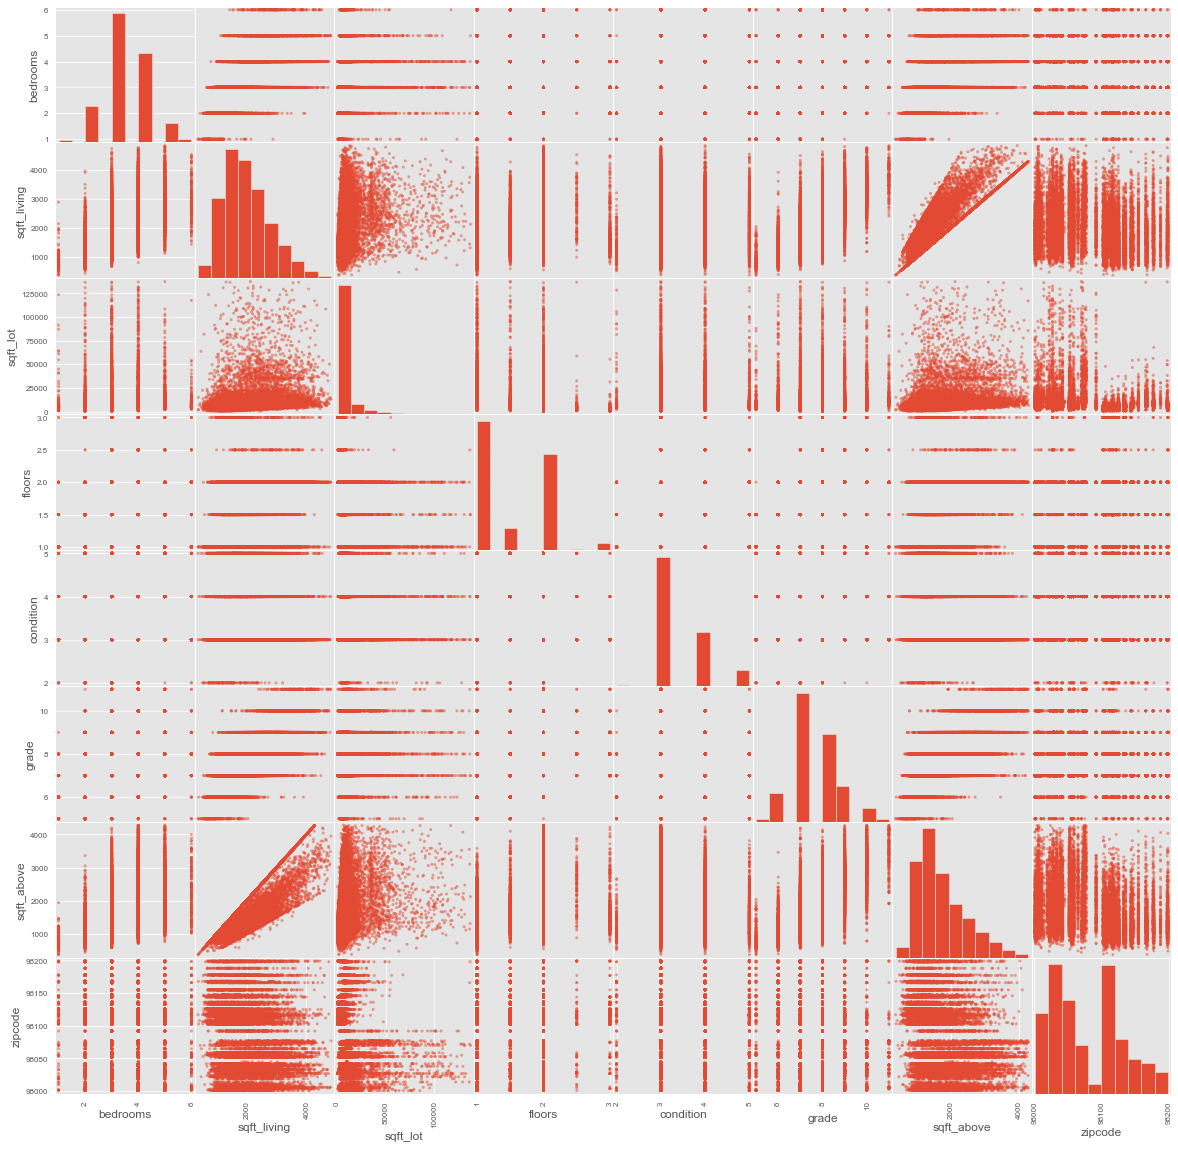

In [54]:
pd.plotting.scatter_matrix(df_pred, figsize=(20,20))
plt.show()

In [55]:
# Create a correlation matrix of the predictors
df_pred.corr()

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode
bedrooms,1.000000,0.610137,0.086051,0.167884,0.018136,0.347204,0.489559,-0.164628
sqft_living,0.610137,1.000000,0.222143,0.346054,-0.067507,0.719893,0.847515,-0.197477
sqft_lot,0.086051,0.222143,1.000000,-0.092537,0.037234,0.137504,0.207111,-0.181343
floors,0.167884,0.346054,-0.092537,1.000000,-0.280678,0.455124,0.538187,-0.056642
condition,0.018136,-0.067507,0.037234,-0.280678,1.000000,-0.170915,-0.178561,-0.007313
grade,0.347204,0.719893,0.137504,0.455124,-0.170915,1.000000,0.714804,-0.179733
sqft_above,0.489559,0.847515,0.207111,0.538187,-0.178561,0.714804,1.000000,-0.266273
zipcode,-0.164628,-0.197477,-0.181343,-0.056642,-0.007313,-0.179733,-0.266273,1.000000


A correlation with an absolute value around **0.7-0.8 or higher is considered a high correlation**. I will use **0.75** as a cut-off.

In [56]:
# Create a correlation matrix of booleans that state whether or not correlation is greater than 0.75
abs(df_pred.corr()) > 0.75

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode
bedrooms,True,False,False,False,False,False,False,False
sqft_living,False,True,False,False,False,False,True,False
sqft_lot,False,False,True,False,False,False,False,False
floors,False,False,False,True,False,False,False,False
condition,False,False,False,False,True,False,False,False
grade,False,False,False,False,False,True,False,False
sqft_above,False,True,False,False,False,False,True,False
zipcode,False,False,False,False,False,False,False,True


In [57]:
# Create a dataframe using stackand a subset to return highly correlated pairs

df=df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates
df.drop_duplicates(inplace=True)

In [58]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.847515


There is only one set of variables that is highly correlated, 'sqft_above' and 'sqft_living'

<AxesSubplot:>

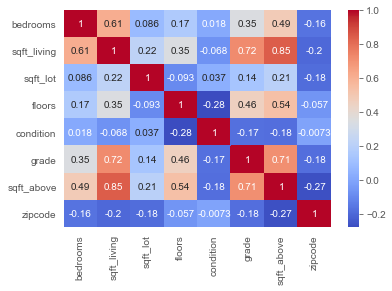

In [59]:
# Make a heatmap visual of correlation of predictors
sns.heatmap(df_pred.corr(), annot=True, cmap="coolwarm")

In [60]:
# To remove collinear features, it is typical to remove one variable per pair. I will remove the "sqft_above" column from the df
df_pred.drop(columns = ['sqft_above'], inplace=True)
kc_house_df.drop(columns = ['sqft_above'], inplace=True)

In [61]:
df_pred.head()

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode
1,3,2570,7242,2.0,3,7,98125
2,2,770,10000,1.0,3,6,98028
3,4,1960,5000,1.0,5,7,98136
4,3,1680,8080,1.0,3,8,98074
6,3,1715,6819,2.0,3,7,98003


In [62]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long
1,538000.0,3,2570,7242,2.0,3,7,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,3,6,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,5,7,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,3,8,98074,47.6168,-122.045
6,257500.0,3,1715,6819,2.0,3,7,98003,47.3097,-122.327


***
## Normalize continuous features

I need to convert all numeric columns to the same scale by normalizing the dataset. I will do this by converting each numeric value to it's corresponding **z-score** for the column, which is obtained by **subtracting the column's mean and then dividing by the column's standard deviation for every value.**

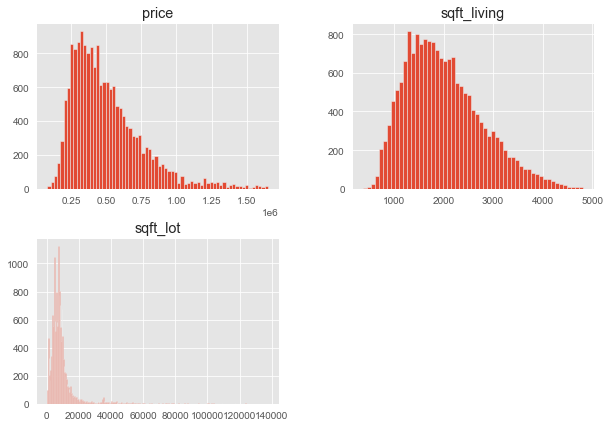

In [63]:
continuous = ['price', 'sqft_living', 'sqft_lot']
categoricals = ['bedrooms', 'floors', 'condition', 'grade', 'zipcode']

kc_house_df[continuous].hist(figsize = (10,7), bins = 'auto');

The continuous variables need to be more normal. 'sqft_lot' column has a lot of zeros so it is best to leave it be.

In [64]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,lat,long
1,538000.0,3,2570,7242,2.0,3,7,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,3,6,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,5,7,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,3,8,98074,47.6168,-122.045
6,257500.0,3,1715,6819,2.0,3,7,98003,47.3097,-122.327


In [65]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17925 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        17925 non-null  float64
 1   bedrooms     17925 non-null  int64  
 2   sqft_living  17925 non-null  int64  
 3   sqft_lot     17925 non-null  int64  
 4   floors       17925 non-null  float64
 5   condition    17925 non-null  int64  
 6   grade        17925 non-null  int64  
 7   zipcode      17925 non-null  int64  
 8   lat          17925 non-null  float64
 9   long         17925 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1.5 MB


In [66]:
continuous = ['price', 'sqft_living']
df_cont = kc_house_df[continuous]

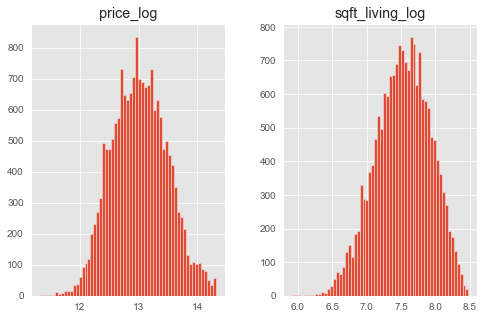

In [67]:
# Performing log transformation on continuous variable

log_names = [f'{column}_log' for column in df_cont.columns]
df_log = np.log(df_cont)
df_log.columns = log_names
df_log.hist(figsize=(8,5), bins = 'auto')
fig.tight_layout()

The histogram looks a lot more normal now!

array([[<AxesSubplot:title={'center':'price_log'}>,
        <AxesSubplot:title={'center':'sqft_living_log'}>]], dtype=object)

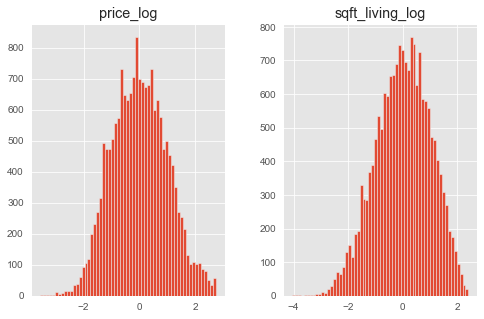

In [68]:
# Standardize the continuous variables
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_cont_log = df_log.apply(normalize)
df_cont_log.hist(figsize = (8,5), bins = 'auto')

***
## Saving dataframe

In [69]:
kc_house_df.to_csv("kc_df_cleaned.csv", index=False)

In [70]:
df_cont_log.to_csv("df_cont_log_cleaned.csv", index=False)